<h3> LAB 14 - An$á$lise espectral de sinais com ru$í$do - periodograma</h3>
<h5> Processamento Digital de Sinais I - TE352 </h5>
<h5> Leonardo Barbosa da Silva GRR20162855 </h5> 

Objetivo: Detecção de Tom multifrequencial na presença de ruído (análise espectral)

In [9]:
# Inicializa os pacotes que serão utilizados
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftfreq, fftshift
from scipy.signal import welch
from scipy import signal

<b> 1) </b> Considere o tons do sistema de sinalização DTMF do laboratório anterior, apenas a tecla 1.

In [3]:
Fs = 8000
t = 0.128  # Amostragem de Fs=8000 para 1024 amostras  
n = np.arange(0, t, 1/Fs)

tecla_1 = np.sin(2 * np.pi * 1209 * n) + np.sin(2 * np.pi * 697 * n)

<b> 3) </b> Gerar sinais x1, x3 e x5 com 1024 amostras da tecla '1' com ruído gaussiano branco adicionado, com desvio padrão sigma=1, sigma=3 e sigma=5, respectivamente. Considere taxa de amostragem Fs=8000. Visualize os sinais no tempo.

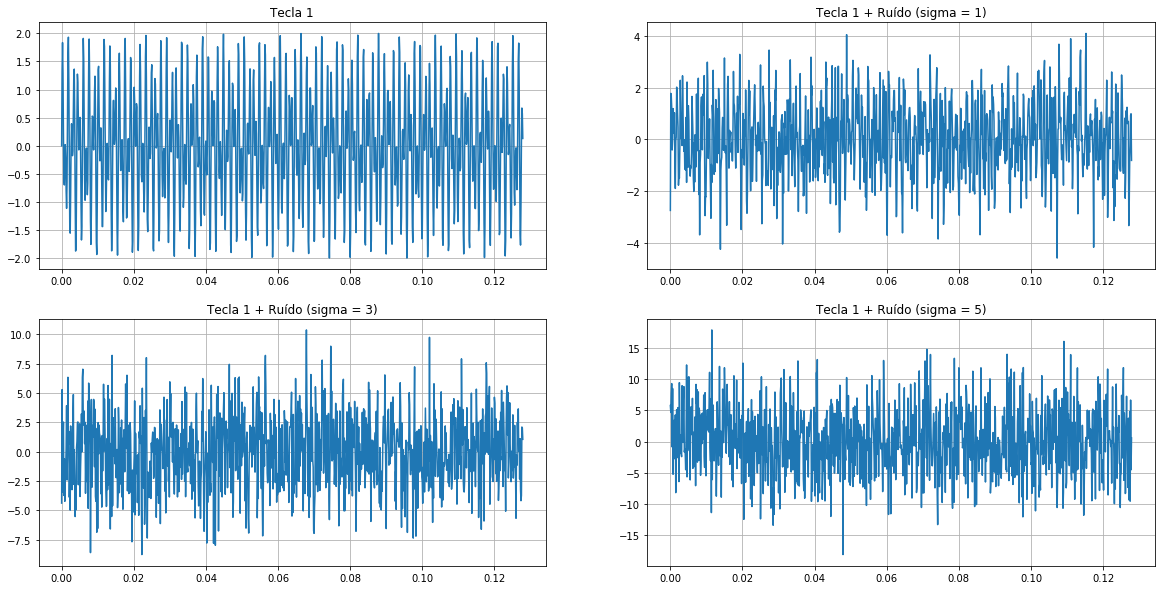

In [4]:
# A taxa Fs=8000 foi considerada quando o vetor n foi gerado

x1 = tecla_1 + np.random.normal(0, 1, 1024)
x3 = tecla_1 + np.random.normal(0, 3, 1024)
x5 = tecla_1 + np.random.normal(0, 5, 1024)

plt.figure(figsize = (20, 10))
plt.subplot(2, 2, 1)
plt.grid()
plt.title('Tecla 1')
plt.plot(n,tecla_1)
plt.subplot(2, 2, 2)
plt.grid()
plt.title('Tecla 1 + Ruído (sigma = 1)')
plt.plot(n,x1)
plt.subplot(2, 2, 3)
plt.grid()
plt.title('Tecla 1 + Ruído (sigma = 3)')
plt.plot(n,x3)
plt.subplot(2, 2, 4)
plt.grid()
plt.title('Tecla 1 + Ruído (sigma = 5)')
plt.plot(n,x5)
plt.show()

<b> 5) </b> Plote o sinal em frequência usando 4 métodos diferentes para a estimativa do espectro (periodograma de Welch com diferentes janelas (tipo / tamanho).

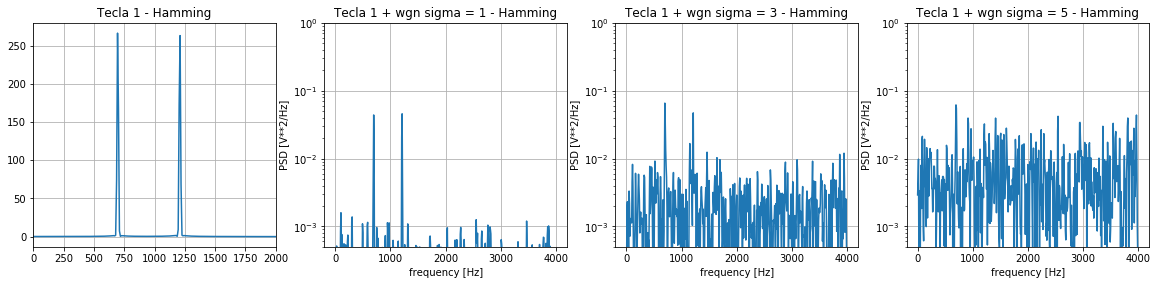

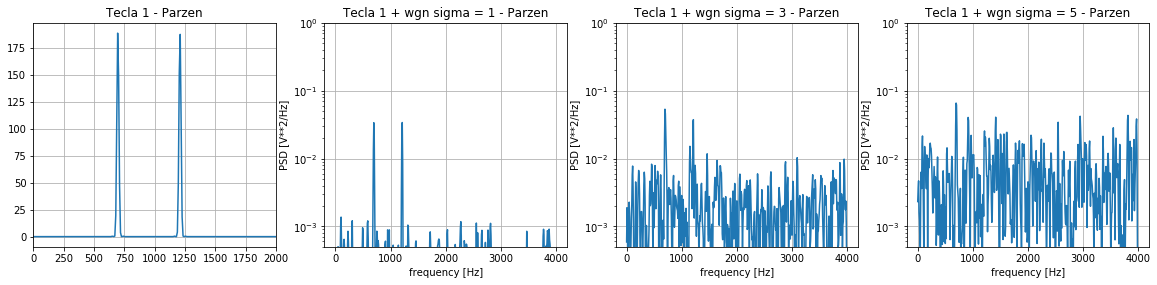

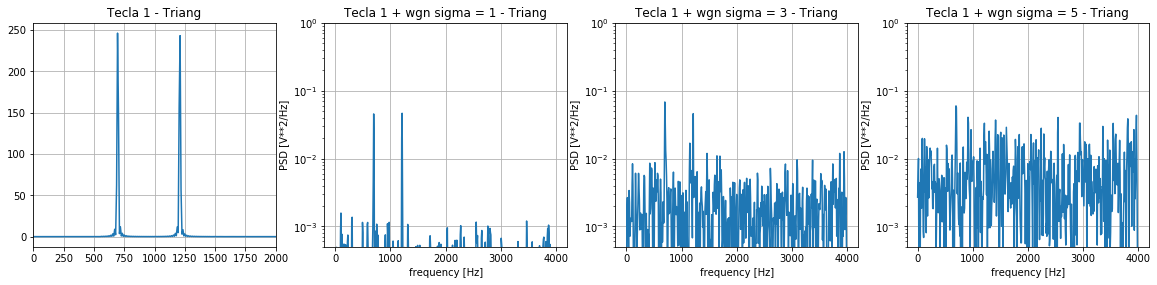

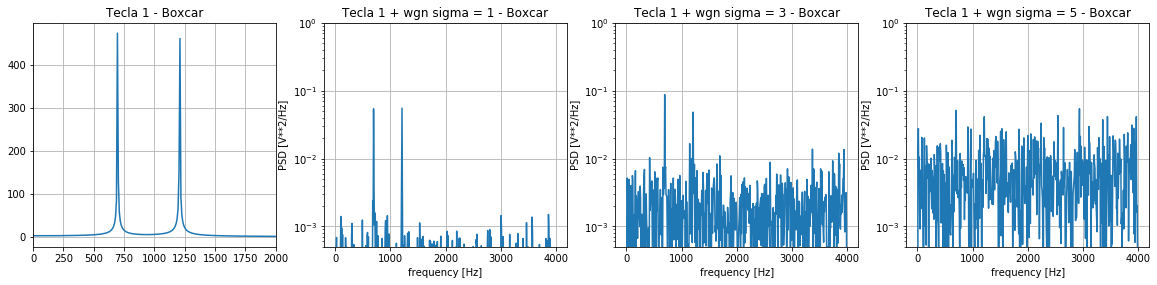

In [12]:
# Baseado na documentation do Scipy:
# scipy.signal.welch:
# https://docs.scipy.org/doc/scipy-0.14.0/reference/
# generated/scipy.signal.welch.html

# scipy.signal.get_window
# https://docs.scipy.org/doc/scipy-0.14.0/reference/
# generated/scipy.signal.get_window.html#scipy.signal.get_window

N = 1024
xf = fftfreq(N, 1/Fs)
xf = fftshift(xf)

plt.figure(figsize = (20, 14))

plt.subplot(3, 4, 1)
plt.xlim([0, 2000])
plt.grid()
plt.title('Tecla 1 - Hamming')
plt.plot(xf, abs(fftshift(fft(tecla_1 * signal.hamming(1024, 0)))))

plt.subplot(3, 4, 2)
plt.grid()
plt.title( 'Tecla 1 + wgn sigma = 1 - Hamming')
f, Pxx_den = signal.welch(x1, Fs, 'hamming', nperseg = 1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.subplot(3, 4, 3)
plt.grid()
plt.title('Tecla 1 + wgn sigma = 3 - Hamming')
f, Pxx_den = signal.welch(x3, Fs, 'hamming', nperseg = 1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.subplot(3, 4, 4)
plt.grid()
plt.title('Tecla 1 + wgn sigma = 5 - Hamming')
f, Pxx_den = signal.welch(x5, Fs, 'hamming', nperseg = 1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.figure(figsize = (20, 14))

plt.subplot(3, 4, 1)
plt.xlim([0, 2000])
plt.grid()
plt.title('Tecla 1 - Parzen')
plt.plot(xf, abs(fftshift(fft(tecla_1 * signal.parzen(1024)))))

plt.subplot(3, 4, 2)
plt.grid()
plt.title( 'Tecla 1 + wgn sigma = 1 - Parzen')
f, Pxx_den = signal.welch(x1, Fs, 'parzen', nperseg = 1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.subplot(3, 4, 3)
plt.grid()
plt.title('Tecla 1 + wgn sigma = 3 - Parzen')
f, Pxx_den = signal.welch(x3, Fs, 'parzen', nperseg = 1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.subplot(3, 4, 4)
plt.grid()
plt.title('Tecla 1 + wgn sigma = 5 - Parzen')
f, Pxx_den = signal.welch(x5, Fs, 'parzen', nperseg = 1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.figure(figsize = (20, 14))

plt.subplot(3, 4, 1)
plt.xlim([0, 2000])
plt.grid()
plt.title('Tecla 1 - Triang')
plt.plot(xf, abs(fftshift(fft(tecla_1 * signal.triang(1024)))))

plt.subplot(3, 4, 2)
plt.grid()
plt.title( 'Tecla 1 + wgn sigma = 1 - Triang')
f, Pxx_den = signal.welch(x1, Fs, 'triang', nperseg = 1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.subplot(3, 4, 3)
plt.grid()
plt.title('Tecla 1 + wgn sigma = 3 - Triang')
f, Pxx_den = signal.welch(x3, Fs, 'triang', nperseg = 1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.subplot(3, 4, 4)
plt.grid()
plt.title('Tecla 1 + wgn sigma = 5 - Triang')
f, Pxx_den = signal.welch(x5, Fs, 'triang', nperseg = 1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.figure(figsize = (20, 14))

plt.subplot(3, 4, 1)
plt.xlim([0, 2000])
plt.grid()
plt.title('Tecla 1 - Boxcar')
plt.plot(xf, abs(fftshift(fft(tecla_1 * signal.boxcar(1024)))))

plt.subplot(3, 4, 2)
plt.grid()
plt.title( 'Tecla 1 + wgn sigma = 1 - Boxcar')
f, Pxx_den = signal.welch(x1, Fs, 'boxcar', nperseg = 1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.subplot(3, 4, 3)
plt.grid()
plt.title('Tecla 1 + wgn sigma = 3 - Boxcar')
f, Pxx_den = signal.welch(x3, Fs, 'boxcar', nperseg = 1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.subplot(3, 4, 4)
plt.grid()
plt.title('Tecla 1 + wgn sigma = 5 - Boxcar')
f, Pxx_den = signal.welch(x5, Fs, 'boxcar', nperseg = 1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.show()